# CS4102 Assignment 2

James Spillane(18342921)

## Question 1

In [ ]:
!pip install opencv-python

In [1]:
import numpy as np
import matplotlib.cm as cm
import os 
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
root = 'orl_faces'

In [3]:
!tree {root}

Folder PATH listing
Volume serial number is 00000015 488D:B1DD
C:\USERS\JAMES\ORL_FACES
ÃÄÄÄs1
ÃÄÄÄs10
ÃÄÄÄs11
ÃÄÄÄs12
ÃÄÄÄs13
ÃÄÄÄs14
ÃÄÄÄs15
ÃÄÄÄs16
ÃÄÄÄs17
ÃÄÄÄs18
ÃÄÄÄs19
ÃÄÄÄs2
ÃÄÄÄs20
ÃÄÄÄs21
ÃÄÄÄs22
ÃÄÄÄs23
ÃÄÄÄs24
ÃÄÄÄs25
ÃÄÄÄs26
ÃÄÄÄs27
ÃÄÄÄs28
ÃÄÄÄs29
ÃÄÄÄs3
ÃÄÄÄs30
ÃÄÄÄs31
ÃÄÄÄs32
ÃÄÄÄs33
ÃÄÄÄs34
ÃÄÄÄs35
ÃÄÄÄs36
ÃÄÄÄs37
ÃÄÄÄs38
ÃÄÄÄs39
ÃÄÄÄs4
ÃÄÄÄs40
ÃÄÄÄs5
ÃÄÄÄs6
ÃÄÄÄs7
ÃÄÄÄs8
ÀÄÄÄs9


In [4]:
def read_images(root):
    c = 0
    X, y = [], []
    for folder in next(os.walk(root))[1]:
        for name in os.listdir(os.path.join(root, folder)):
            path = os.path.join(root, folder, name)
            im = Image.open(path)
            X.append(np.array(im))
            y.append(c)
        c += 1
    return np.array(X), y

In [5]:
X, y = read_images(root)

In [6]:
def pca(X):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu
    if n > d:
        C = X.T @ X
        evalues, evectors = np.linalg.eigh(C)
    else:
        C = X @ X.T
        evalues, evectors = np.linalg.eigh(C)
        evectors = X.T @ evectors
        for i in range(n):
            evectors[:,i] = evectors[:,i]/np.linalg.norm(evectors[:,i])

    # sort evectors descending by their evalue
    idx = np.argsort(-evalues)
    evalues = evalues[idx]
    evectors = evectors[:,idx]

    return evalues, evectors, mu

In [7]:
D, W, mu = pca(X.reshape((X.shape[0], -1)))

In [8]:
def normalize(X, low, high, dtype=None):
    minX, maxX = np.min(X), np.max(X)

    # normalize to [0...1].	
    X = X - float(minX)
    X = X / float(maxX - minX)

    # scale to [low...high].
    X = X * (high-low)
    X = X + low

    if dtype is None:
        return X
    return np.array(X, dtype=dtype)

In [9]:
def project(W, X, mu):
    return (X - mu) @ W

In [10]:
def reconstruct(W, Y, mu):
    return Y @ W.T + mu

In [11]:
def subplot(title, images, rows, cols, sptitle="subplot", sptitles=[], colormap=cm.gray, filename=None):
    fig = plt.figure()

    # main title
    fig.text(.5, .95, title, horizontalalignment='center')

    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        if len(sptitles) == len(images):
            plt.title("%s #%s" % (sptitle, str(sptitles[i])), { 'fontsize': 8 })
        else:
            plt.title("%s #%d" % (sptitle, i+1), { 'fontsize': 8 })
        plt.imshow(np.asarray(images[i]), cmap=colormap)
        plt.axis('off')

    if filename is None:
        plt.show()
    else:
        fig.savefig(filename)

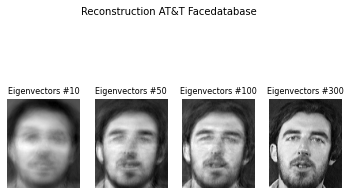

In [12]:
steps = [10,50,100,300]
E = []
for step in steps:
    P = project(W[:,:step], X[21].reshape(-1), mu)
    R = reconstruct(W[:,:step], P, mu).reshape(X[0].shape)
    E.append(normalize(R, 0, 255, dtype=np.uint8))
subplot(
    title="Reconstruction AT&T Facedatabase", 
    images=E, 
    rows=1, cols=4, 
    sptitle="Eigenvectors", 
    sptitles=steps, 
    colormap=cm.gray, 
    filename="python_pca_reconstruction.pdf"
)

In [51]:
var = []
for n in steps:
    var.append(sum(D[:n])/sum(D))
for step, variance in zip(steps, var):
    print('Steps: %f variance: %f' % (step,variance))

Steps: 10.000000 variance: 0.599519
Steps: 50.000000 variance: 0.816050
Steps: 100.000000 variance: 0.890580
Steps: 300.000000 variance: 0.985096


# Question 2

In [35]:
me = cv2.imread('IMG_5323.pgm', cv2.IMREAD_GRAYSCALE)
me = cv2.resize(me, (92,112))

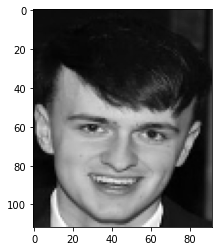

In [32]:
plt.imshow(me, cmap=cm.gray)

In [33]:
D_2, W_2, mu_2 = pca(me_array)

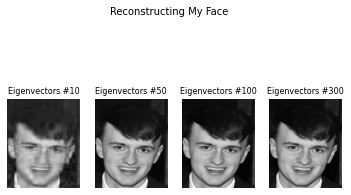

In [39]:
steps = [10,50,100,300]
E = []
for step in steps:
    P = project(W_2[:,:step], me, mu_2)
    R = reconstruct(W_2[:,:step], P, mu_2).reshape(me.shape)
    E.append(normalize(R, 0, 255, dtype=np.uint8))
subplot(
    title="Reconstructing My Face", 
    images=E, 
    rows=1, cols=4, 
    sptitle="Eigenvectors", 
    sptitles=steps, 
    colormap=cm.gray, 
    filename="python_pca_reconstruction.pdf"
)

As we can see the image seems to be clear when eigenvectors = 50. 

In [52]:
var = []
for n in steps:
    var.append(sum(D_2[:n])/sum(D_2))
for step, variance in zip(steps, var):
    print('Steps: %f variance: %f' % (step,variance))

Steps: 10.000000 variance: 0.959329
Steps: 50.000000 variance: 0.999144
Steps: 100.000000 variance: 1.000000
Steps: 300.000000 variance: 1.000000


## Question 3

In [19]:
#used cv2 as it allowed me to resize images to get the distance
friend = cv2.imread('IMG_5325.pgm', cv2.IMREAD_GRAYSCALE)
friend = cv2.resize(friend, (92,112))

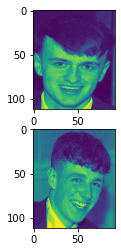

In [44]:
f, axarr = plt.subplots(2,1)
axarr[0].imshow(me)
axarr[1].imshow(friend)

In [45]:
D_3, W_3, mu_3 = pca(friend)

In [46]:
P_2 = project(W_3[:,:300], me, mu_2)
R_2 = reconstruct(W_2[:,:300], P_2, mu_2).reshape(me.shape)
me_300 = normalize(R_2, 0, 255, dtype=np.uint8)

In [47]:
P_3 = project(W_3[:,:300], friend, mu_3)
R_3 = reconstruct(W_3[:,:300], P_3, mu_3).reshape(friend.shape)
friend_300 = normalize(R_3, 0, 255, dtype=np.uint8)

Lets use EuclideanDistance.

In [48]:
class AbstractDistance(object):
    def __init__(self, name):
       self._name = name
    
    def __call__(self,p,q):
        raise NotImplementedError('Every AbstractDistance must implement the __call__ method.')
    
    @property
    def name(self):
        return self._name
    
    def __repr__(self):
        return self._name
    
class EuclideanDistance(AbstractDistance):
    
    def __init__(self):
        AbstractDistance.__init__(self,'Euclidean Distance')
        
    def __call__(self, p, q):
        p = np.asarray(p).flatten()
        q = np.asarray(q).flatten()
        return np.sqrt(np.sum(np.power((p-q),2)))

In [49]:
e_d = EuclideanDistance()
e_d(me_300, friend_300)

1040.271118507094